In [1]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load dataset into a dataframe
data = pd.read_csv('../data/processed/final_dataset.csv')

In [4]:
data.shape

(25456, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25456 entries, 0 to 25455
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         25456 non-null  object 
 1   Total Cases                     25456 non-null  int64  
 2   New Cases                       25456 non-null  float64
 3   Total Deaths                    25456 non-null  float64
 4   New Deaths                      25456 non-null  float64
 5   Total Recovered                 25456 non-null  float64
 6   New Recovered                   25456 non-null  float64
 7   Active Cases                    25456 non-null  float64
 8   Serious, Critical               25456 non-null  float64
 9   Tot Cases/1M pop                25456 non-null  float64
 10  Deaths/1M pop                   25456 non-null  float64
 11  Total Tests                     25456 non-null  float64
 12  Tests/1M pop                    

In [6]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
1,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
2,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
3,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
4,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58


In [10]:
# Convert date column to date format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [11]:
# Selecting specific columns from the current DataFrame
Q1 = data.loc[:, ['Region', 'Country', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop', 'total_vaccinations', 'Year','date']]

# Displaying the first few rows of Q1
print(Q1.head())

                  Region Country  Tot Cases/1M pop  Deaths/1M pop   
0  Europe & Central Asia  France          612013.0         2556.0  \
1  Europe & Central Asia  France          612013.0         2556.0   
2  Europe & Central Asia  France          612013.0         2556.0   
3  Europe & Central Asia  France          612013.0         2556.0   
4  Europe & Central Asia  France          612013.0         2556.0   

   Tests/1M pop  total_vaccinations  Year       date  
0     4139547.0                 593  2019 2020-12-27  
1     4139547.0                1242  2019 2020-12-28  
2     4139547.0                1610  2019 2020-12-29  
3     4139547.0                2043  2019 2020-12-30  
4     4139547.0                2403  2019 2020-12-31  


In [12]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'Region' column in ascending order
Q1_sorted = Q1.sort_values(by='Region')

C:\Users\joann\AppData\Local\Temp\ipykernel_3456\891637448.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


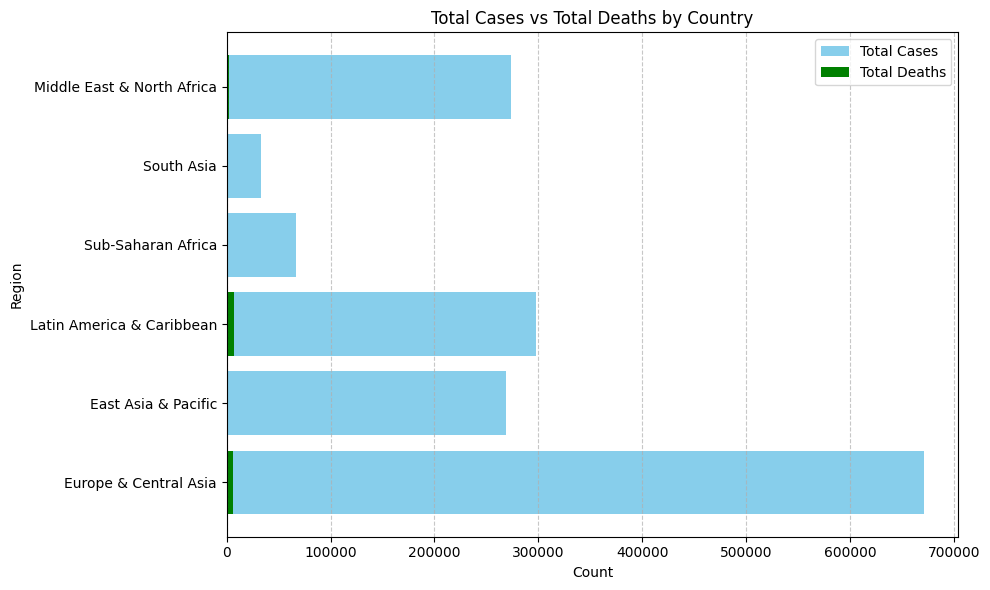

In [17]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(Q1['Region'], Q1['Tot Cases/1M pop'], color='skyblue', label='Total Cases')
plt.barh(Q1['Region'], Q1['Deaths/1M pop'], color='green', label='Total Deaths')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Total Cases vs Total Deaths by Country')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [29]:
selected_columns = [
    'Region', 
    'date', 
    'Tot Cases/1M pop', 
    'Deaths/1M pop', 
    'Tests/1M pop', 
    'total_vaccinations', 
    'Population', 
    'IncomeGroup', 
    'Life Expectancy World Bank'
]

In [28]:
# Filter data for a specific region for analysis
region = 'Europe & Central Asia'
region_data = Q1[Q1['Region'] == region]

In [30]:
# Plotting time-series data for COVID-19 metrics and vaccination rates
plt.figure(figsize=(12, 8))
sns.lineplot(x='date', y='Total Cases', Q1=region_data, label='Total Cases')
sns.lineplot(x='date', y='Total Deaths', Q1=region_data, label='Total Deaths')
sns.lineplot(x='date', y='total_vaccinations', data=country_data, label='Total Vaccinations')
plt.title(f'COVID-19 Metrics and Vaccination Progress in {region}')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

ValueError: Could not interpret value `date` for `x`. Value is a string, but `data` was not passed.

<Figure size 1200x800 with 0 Axes>

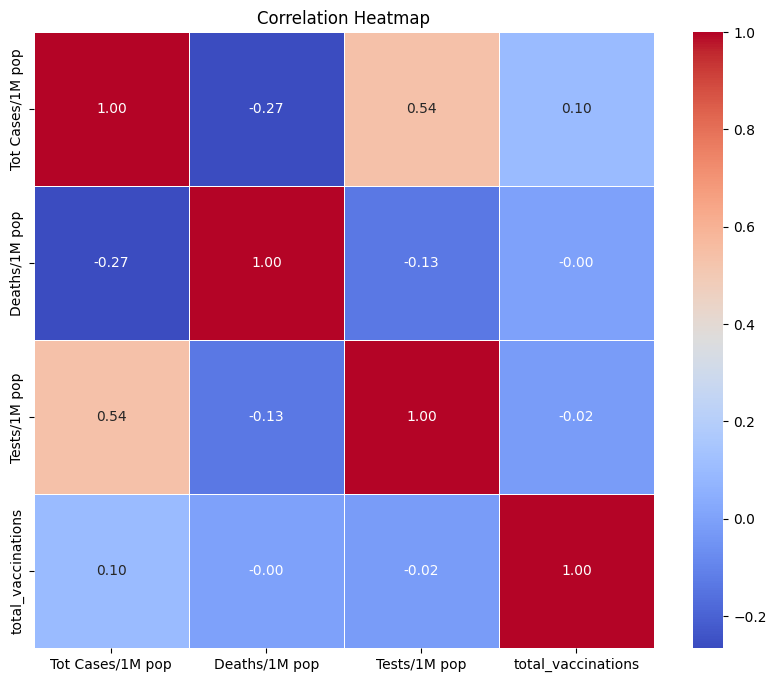

In [27]:
# Selecting relevant columns
selected_columns = ['Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop', 'total_vaccinations']

# Creating a subset DataFrame with selected columns
subset_df = Q1[selected_columns]

# Calculating correlation matrix
correlation_matrix = subset_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

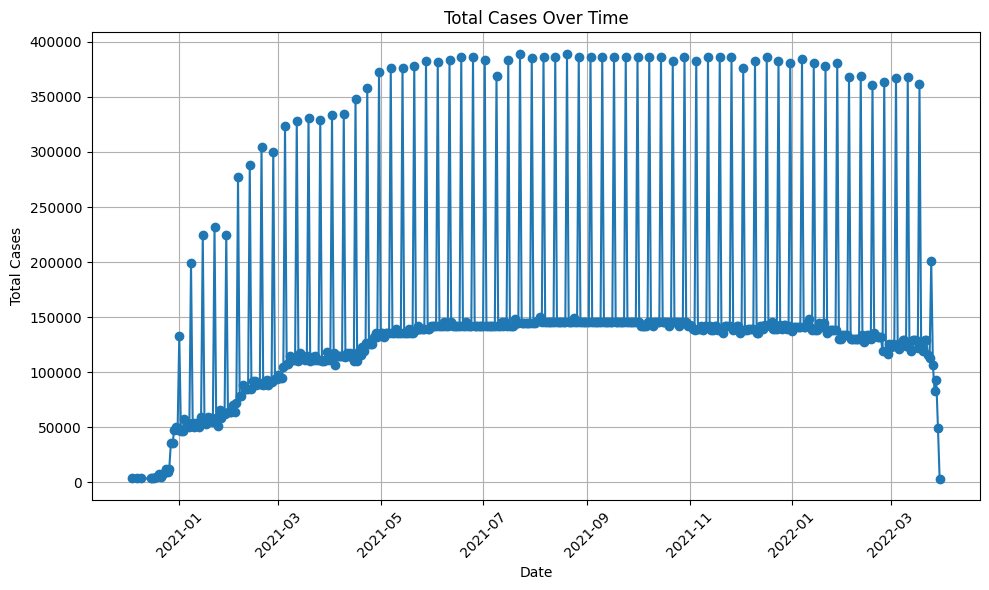

In [26]:
# Group by date and sum the total deaths
total_cases_by_date = Q1.groupby('date')['Tot Cases/1M pop'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_deaths_by_date.index, total_deaths_by_date.values, marker='o', linestyle='-')
plt.title('Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

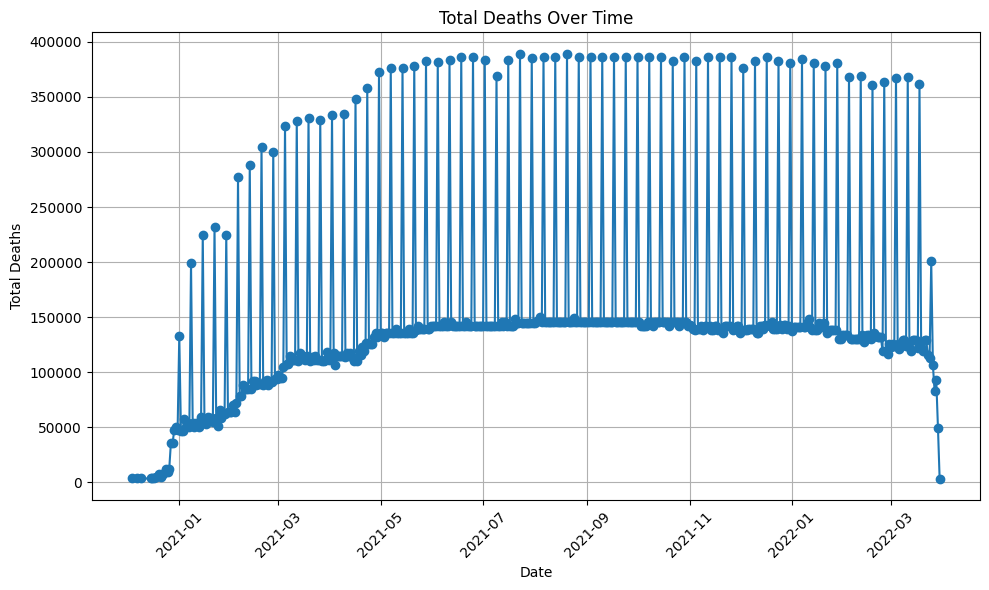

In [25]:
# Group by date and sum the total deaths
total_deaths_by_date = Q1.groupby('date')['Deaths/1M pop'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_deaths_by_date.index, total_deaths_by_date.values, marker='o', linestyle='-')
plt.title('Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

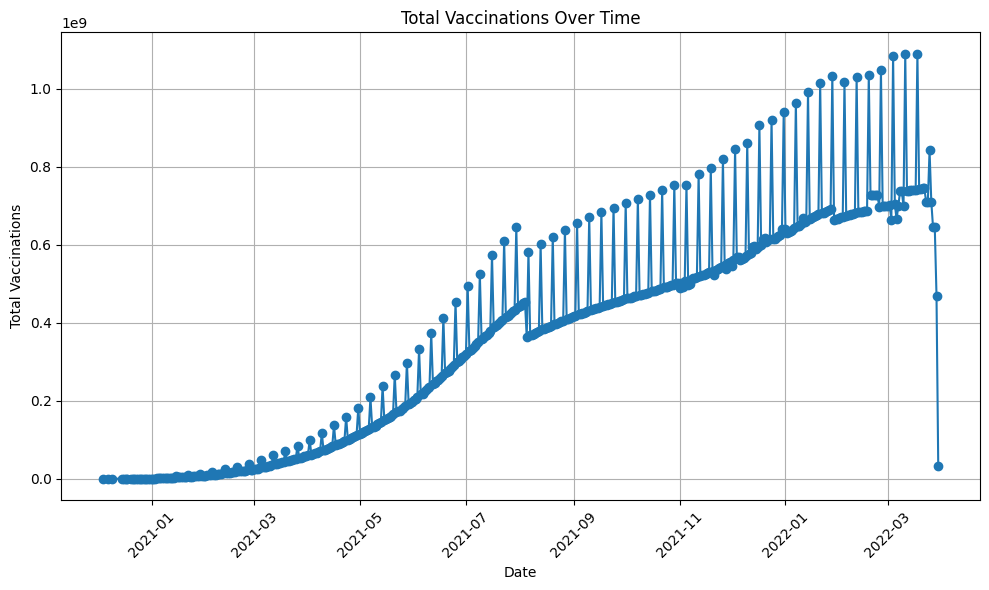

In [23]:
# Group by date and sum the total vaccinations
total_vaccinations_by_date = Q1.groupby('date')['total_vaccinations'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(total_vaccinations_by_date.index, total_vaccinations_by_date.values, marker='o', linestyle='-')
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()